In [44]:
import os
import pandas as pd
import seaborn as sns
import numpy as np
from scipy import stats
sns.set_theme(style='whitegrid')

### Fantasy book recs

In [110]:
#load lists
book_lists = pd.read_csv('../data/fantasy_lists.tsv')
book_lists  = set(book_lists['listTitle'])
dn_lists = set([f.split('.tsv')[0] for f in os.listdir('../data/lists')])
book_lists = set(book_lists).intersection(dn_lists)
book_lists = [pd.read_csv(f'../data/lists/{listName}.tsv',sep='\t') for listName in book_lists]
books = pd.concat(book_lists)
books['no_rating'] = pd.to_numeric(books['no_rating'].str.replace(',',''))

In [115]:
#remove duplicates/clean data
books = books.sort_values('no_rating',ascending=False)
books['title_simple'] = books['title'].apply(lambda x: x.split(' (')[0].lower().strip(' '))
books = books.drop_duplicates(['title_simple','author'])
books = books.reset_index()

title_dup = books['title_simple'].value_counts()
title_dup = pd.Series(title_dup[title_dup>1])
book_dup = books[books['title_simple'].isin(title_dup.index)].sort_values('title_simple')
pd.set_option("display.max_rows", None)
book_dup

index                                              title  \
39470   4511  42 & Beyond: A Space Opera Anthology (42 & Bey...   
39034   4273  42 & Beyond: A Space Opera Anthology (42 & Bey...   
38549   4711  42 & Beyond: A Space Opera Anthology (42 & Bey...   
15106   5800                    A Call to Arms (The Damned, #1)   
21441    265       A Call to Arms (The Chronicles of Arden, #1)   
18673   3004            A Dance with Darkness (Angelfire, #0.5)   
12243   2020     A Dance With Darkness (Otherworld Academy, #1)   
33771    923                                A Ghost of a Chance   
38084    301  A Ghost of a Chance (The Poppy Jones Chronicle...   
27031    647                      A Hidden Magic (Sentinels #1)   
34147   1331                                     A Hidden Magic   
3789    1841                     A Killing Frost (Tomorrow, #3)   
9785      28                A Killing Frost (October Daye, #14)   
15803   3839  A Knight to Remember (Merriweather Sisters #1;...   
39208    462          A Knight to Remember (Realm of Honor, #3)   
31877   1002                 A Matter of Time (Angel Sight, #3)   
24558   3667              A Matter of Time (Thistle & Hive, #4)   
4843     242                                         A New Dawn   
37987   4740            A New Dawn (The New Dawn Series Book 1)   
30107    291                                    A Rush of Wings   
8827     489             A Rush of Wings (The Maker's Song, #1)   
8889    3298             A Stitch in Time (A Stitch in Time #1)   
22813   2793                                   A Stitch in Time   
13634   1460  A Taste of Honey (The Sorcerer of the Wildeeps...   
24598    703            A Taste Of Honey (A Taste of Honey, #1)   
22720    244               A Time of Dying (Araneae Nation, #3)   
34249    488                        A Time Of Dying (Raven, #5)   
30971    721                      A Touch of Darkness (Key, #1)   
1514     348       A Touch of Darkness (Hades & Persephone, #1)   
8423    2819                                          Abduction   
38151   1976                 Abduction (The Ufo Conspiracy, #1)   
18998   1139                          Absolution (Heavenly, #3)   
35157   3465               Absolution (The Godswar Saga Book 4)   
15459   3823                     Absolution (Penton Legacy, #2)   
1830     115                                         Acceptance   
35500    109                    Acceptance (Guarded Secrets #2)   
6751     518                            Adam (Nightwalkers, #6)   
11100   3487                          Adam (The Protectors, #5)   
18768   3858             Adam (Cyborgs: More Than Machines, #6)   
18303    120                   Addict (Hunter, #2; Thieves, #7)   
29726    463                   Addict (The Cassie Tam Files #1)   
39965   3216                    Aden (Blood-Rose Guardians, #4)   
12452     33                     Aden (Vampires in America, #7)   
3649    1108       Affliction (Anita Blake, Vampire Hunter #22)   
38954   1638                                         Affliction   
6718    3877                     After Dark (Ghost Hunters, #1)   
20746    575                     After Dark (The 19th Year, #1)   
10966    462                                     After Midnight   
10035    674                         After Midnight (Cabot, #1)   
38822    772                    After the Fall (Raud Grima, #2)   
25197    435             After the Fall (Roman Time Travel, #2)   
5949     962                                          Afterlife   
40133   3379                          Afterlife (Afterlife, #1)   
6136    1790                     Afterlife (Afterlife Saga, #1)   
2956    1099                          Afterlife (Evernight, #4)   
33284   1381             Afterlife (The Undermountain Saga, #2)   
16471    243                    Aftermath (Thieves' World, #10)   
2756    5259               Aftermath (Star Wars: Aftermath, #1)   
38579    262                              AfterShock (

### Question 1: Do more popular books receive higher ratings?

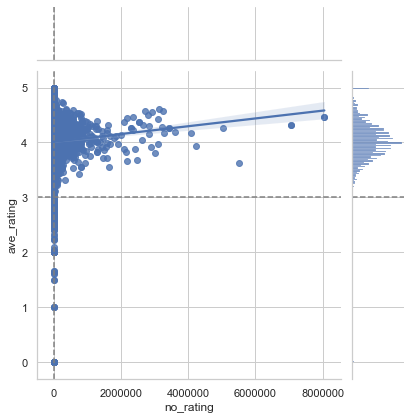

In [116]:
#all fantasy novels
g = sns.JointGrid(data=books, x="no_rating", y="ave_rating")
g.plot(sns.regplot, sns.histplot)
g.refline(x=5000, y=3)

(0.10353618825377921, 6.660388283930205e-23)


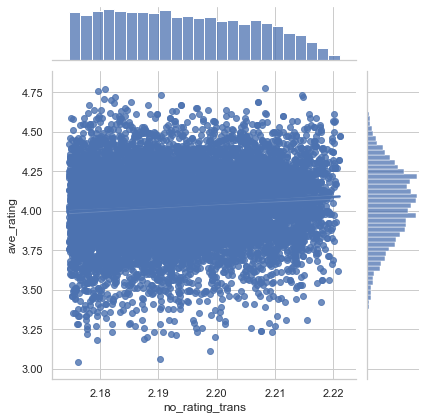

In [151]:
#transforming no ratings to see if relationship still signficant
no_rating_trans, lmbda = stats.boxcox(books['no_rating'])
books['no_rating_trans'] = no_rating_trans

g = sns.JointGrid(data=books, x="no_rating_trans", y="ave_rating")
g.plot(sns.regplot, sns.histplot)
pearson = stats.pearsonr(books['no_rating_trans'], books['ave_rating'])

#### Answer:
Yes, 10% of variation in average ratings can be explained by the number of ratings received

### Question 2: Do more prolific authors have a higher average rating?

In [152]:
authors_no_books = books['author'].value_counts()
authors = authors_no_books.index
authors_ave_rating = books.groupby('author')['ave_rating'].mean()
authors_total_rating = books.groupby('author')['no_rating'].sum()
authors_no_rating = books.groupby('author')['no_rating'].mean()

authors = pd.DataFrame(list(zip(authors,authors_no_books,authors_ave_rating,authors_no_rating,authors_total_rating)),
                       columns = ['author','no_books','ave_ave_rating','ave_no_rating','total_rating'])
authors.sort_values('total_rating',ascending=False)

author  no_books  ave_ave_rating  \
1015                 Walt Disney Company         2        4.375263   
2417                    Jonathan Carroll         1        4.220833   
2378                      Nalo Hopkinson         1        4.018197   
2113                       M.T. Anderson         1        4.314375   
2382                        Ilsa J. Bick         1        3.762500   
1023                  Mary Doria Russell         2        4.137500   
1074                     Philippa Pearce         2        4.120000   
384                        Chris d'Lacey         5        4.316296   
529                         Sarah Gailey         4        3.800000   
351                  Jessica Shirvington         6        4.099474   
866                        Kalynn Bayron         2        4.080000   
1230                     Cherie Dimaline         2        3.976667   
2566                     McKenzie Hunter         1        3.996000   
2475                        R. Lee Smith         1        4.072656   
868                    Margaret Rogerson         2        4.220000   
2267                         K.J. Sutton         1        4.338000   
1923                        Edan Lepucki         1        4.212703   
925                         Jenn Bennett         2        4.270000   
1463                         J.J. Abrams         1        4.253333   
798                          Jack London         3        3.745000   
299                         Tove Jansson         7        4.266579   
2110                            Kim Dare         1        4.160000   
2118                       Nakaba Suzuki         1        4.001538   
411                   Michael G. Manning         5        3.914333   
1010                        Eloisa James         2        3.810000   
1629                       Lauren Miller         1        3.980000   
466                         Aimee Carter         5        4.122000   
638                       Mark Cotta Vaz         3        4.164444   
2394                           M.M. Kaye         1        4.150000   
1563                      Daniel Wallace         1        4.150000   
1464                        Chad Harbach         1        3.901667   
1185                        Maeve Binchy         2        4.276562   
2029                         Chaim Potok         1        3.948462   
2139                        Laline Paull         1        4.204000   
1763                         Gina Damico         1        3.830000   
1959                         Scott Speer         1        3.847105   
2008                      Jason Reynolds         1        3.653333   
2076                        Hannah Tinti         1        4.086667   
1693                 Immaculée Ilibagiza         1        4.046667   
2621                         Elena Armas         1        3.690000   
614                          Joseph Fink         3        4.254167   
1051                     Catherine Jinks         2        3.951818   
1829                            Tom Holt         1        3.706000   
1411                        Ellen Raskin         1        4.460000   
2318                   Arwen Elys Dayton         1        4.335000   
1723                          Jeff Smith         1        4.222000   
1503                    Richard Awlinson         1        3.971000   
660                          Tonke Dragt         3        3.660000   
86                          Kevin Hearne        17        3.830000   
1966                           Teri Hall         1        3.980000   
1022                       James Herbert         2        4.270000   
1740                        Paula Morris         1        4.380000   
986                Kathleen E. Woodiwiss         2        4.138387   
1149                      Elizabeth Hoyt         2        4.238235   
1521                   Caitlin Kittredge         1        4.237500   
1641              Linda Masemore Pirrung         1        4.060000   
62                    Karen Marie Moning    

(-0.013565334426783903, 0.4844230457586932)


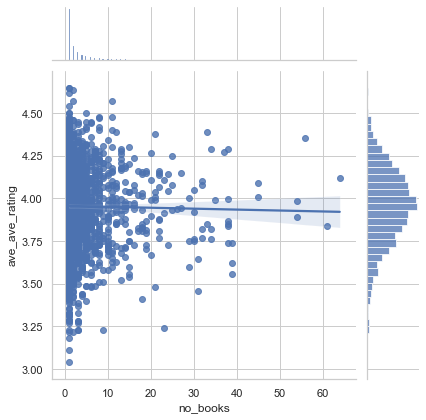

In [155]:
g = sns.JointGrid(data=authors, x="no_books", y="ave_ave_rating")
g.plot(sns.regplot, sns.histplot)
pearson = stats.pearsonr(authors['no_books'], authors['ave_ave_rating'])
print(pearson)

(-0.010038011309652636, 0.6048876764118597)


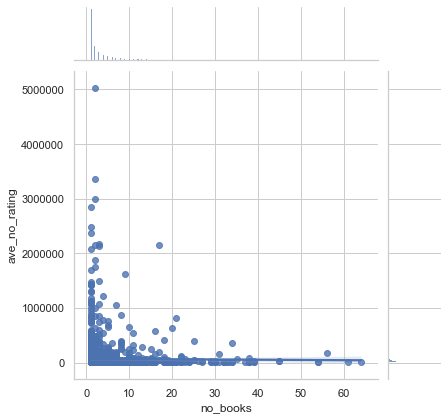

In [156]:
g = sns.JointGrid(data=authors, x="no_books", y="ave_no_rating")
g.plot(sns.regplot, sns.histplot)
pearson = stats.pearsonr(authors['no_books'], authors['ave_no_rating'])
print(pearson)

#### Answer:
No, authors with more published books are not likely to show higher average ratings or a larger number of ratings per book. 

### Question 3: What are some fantasy book recommendations, filterable by popularity and average rating?

In [166]:
import ipywidgets as widgets
widgets.IntSlider(
    min=0,
    max=10,
    step=1,
    description='Slider:',
    value=3
)
from IPython.display import display
slider = widgets.IntSlider(
    min=0,
    max=10,
    step=2,
    description='Slider:',
    value=3
)
slider5 = widgets.IntSlider(
    min=0,
    max=50,
    step=5,
    description='Slider:',
    value=3
)
display(slider5)



IntSlider(value=3, description='Slider:', max=50, step=5)

UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa3 in position 7: invalid start byte

In [172]:
url = "~/Downloads/international-visitors-london-raw.csv"
df_london = pd.read_csv(url,encoding= 'unicode_escape')

ALL = 'ALL'
def unique_sorted_values_plus_ALL(array):
    unique = array.unique().tolist()
    unique.sort()
    unique.insert(0, ALL)
    return(unique)

dropdown_year = widgets.Dropdown(options =    
                    unique_sorted_values_plus_ALL(df_london.year))

def dropdown_year_eventhandler(change):
    if (change.new == ALL):
        display(df_london)
    else:
        display(df_london[df_london.year == change.new])
        
dropdown_year.observe(dropdown_year_eventhandler, names='value')
display(dropdown_year)

Dropdown(options=('ALL', '2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012…

year           quarter                         market     dur_stay  \
3397  2003     January-March                        Belgium  1-3  nights   
3398  2003     January-March                        Belgium  1-3  nights   
3399  2003     January-March                        Belgium  1-3  nights   
3400  2003     January-March                        Belgium  1-3  nights   
3401  2003     January-March                        Belgium  1-3  nights   
3402  2003     January-March                        Belgium  1-3  nights   
3403  2003     January-March                        Belgium  1-3  nights   
3404  2003     January-March                        Belgium  1-3  nights   
3405  2003     January-March                        Belgium  1-3  nights   
3406  2003     January-March                        Belgium  1-3  nights   
3407  2003     January-March                        Belgium  1-3  nights   
3408  2003     January-March                        Belgium  4-7  nights   
3409  2003     January-March                        Belgium  4-7  nights   
3410  2003     January-March                        Belgium  4-7  nights   
3411  2003     January-March                        Belgium  4-7  nights   
3412  2003     January-March                        Belgium  4-7  nights   
3413  2003     January-March                        Belgium  4-7  nights   
3414  2003     January-March                        Belgium  4-7  nights   
3415  2003     January-March                        Belgium  8-14 nights   
3416  2003     January-March                        Belgium  15+  nights   
3417  2003     January-March                        Belgium  15+  nights   
3418  2003     January-March                        Belgium  15+  nights   
3419  2003     January-March                     Luxembourg  1-3  nights   
3420  2003     January-March                     Luxembourg  1-3  nights   
3421  2003     January-March                     Luxembourg  1-3  nights   
3422  2003     January-March                     Luxembourg  1-3  nights   
3423  2003     January-March                     Luxembourg  1-3  nights   
3424  2003     January-March                     Luxembourg  1-3  nights   
3425  2003     January-March                     Luxembourg  4-7  nights   
3426  2003     January-March                         France  1-3  nights   
3427  2003     January-March                         France  1-3  nights   
3428  2003     January-March                         France  1-3  nights   
3429  2003     January-March                         France  1-3  nights   
3430  2003     January-March                         France  1-3  nights   
3431  2003     January-March                         France  1-3  nights   
3432  2003     January-March                         France  1-3  nights   
3433  2003     January-March                         France  1-3  nights   
3434  2003     January-March                         France  1-3  nights   
3435  2003     January-March                         France  1-3  nights   
3436  2003     January-March                         France  1-3  nights   
3437  2003     January-March                         France  1-3  nights   
3438  2003     January-March                         France  4-7  nights   
3439  2003     January-March                         France  4-7  nights   
3440  2003     January-March                         France  4-7  nights   
3441  2003     January-March                         France  4-7  nights   
3442  2003     January-March                         France  4-7  nights   
3443  2003     January-March                         France  4-7  nights   
3444  2003     January-March                         France  4-7  nights   
3445  2003     January-March                         France  4-7  nights   
3446  2003     January-March                         France  4-7  nights   
3447  2003     January-March                         France  4-7  nights   
3448  2003     January-March                         F

In [157]:
books = books[books['no_rating']>=5000]
books = books[books['ave_rating']>=4.200]
print(books['no_rating'].describe([.1,.2,.3,.4,.5,.6,.7,.8,.9]))
books = books.sort_values('ave_rating', axis=0, ascending=False)

count    2.353000e+03
mean     9.781369e+04
std      4.310970e+05
min      5.003000e+03
10%      6.209400e+03
20%      7.685000e+03
30%      9.823200e+03
40%      1.237920e+04
50%      1.674600e+04
60%      2.386560e+04
70%      3.694960e+04
80%      6.177800e+04
90%      1.403372e+05
max      8.051669e+06
Name: no_rating, dtype: float64


In [67]:
authors = books['author'].value_counts()
authors[authors > 20]

Terry Pratchett        83
Sherrilyn Kenyon       62
Mercedes Lackey        61
Stephen King           61
Christine Feehan       54
                       ..
Karen Marie Moning     21
Cate Tiernan           21
Michael J. Sullivan    21
Jeaniene Frost         21
John Flanagan          21
Name: author, Length: 71, dtype: int64

output tiered lists based on popularity

In [84]:
popular_books = books[books['no_rating']>=100000]
popular_books.to_csv('../results/fantasy_popular_books.tsv',sep='\t', index=False)
midtier_books = books[(books['no_rating']>=15000) & (books['no_rating']<100000)]
midtier_books.to_csv('../results/fantasy_midtier_books.tsv',sep='\t', index=False)
lessknown_books = books[(books['no_rating']<15000)]
lessknown_books.to_csv('../results/fantasy_lessknown_books.tsv',sep='\t',index=False)

### Improvements

There are duplicate entries for some books

Book list spider breaks periodically due to page not loading